In [3]:
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

# Download Apple Stock Data
data = yf.download("AAPL", start="2025-01-01", end="2025-11-18")

# Show first rows
data.head()

C:\Users\gasha\AppData\Local\Temp\ipykernel_67104\335990297.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2025-01-01", end="2025-11-18")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-01-02,242.752106,247.978468,240.731247,247.809220,55740700
2025-01-03,242.264313,243.080613,240.800930,242.264313,40244100
2025-01-06,243.896912,246.216423,242.105013,243.210016,45045600
2025-01-07,241.119476,244.444435,240.263348,241.885999,40856000
2025-01-08,241.607254,242.612716,238.969192,240.830767,37628900


In [5]:
#flatten multi index
data.columns = data.columns.get_level_values(0)
data

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-01-02,242.752106,247.978468,240.731247,247.809220,55740700
2025-01-03,242.264313,243.080613,240.800930,242.264313,40244100
2025-01-06,243.896912,246.216423,242.105013,243.210016,45045600
2025-01-07,241.119476,244.444435,240.263348,241.885999,40856000
2025-01-08,241.607254,242.612716,238.969192,240.830767,37628900
...,...,...,...,...,...
2025-11-11,275.250000,275.910004,269.799988,269.809998,46208300
2025-11-12,273.470001,275.730011,271.700012,275.000000,48398000
2025-11-13,272.950012,276.700012,272.089996,274.109985,49602800


In [7]:
# clean stock data 
#remove rows with missing values
data = data.dropna()
#ensure correct data type
for col in ['Open','High','Low','Close','Volume']:
    data[col] = data[col].astype(float)
#data[col]

In [8]:
# Calculate the Moving Average
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

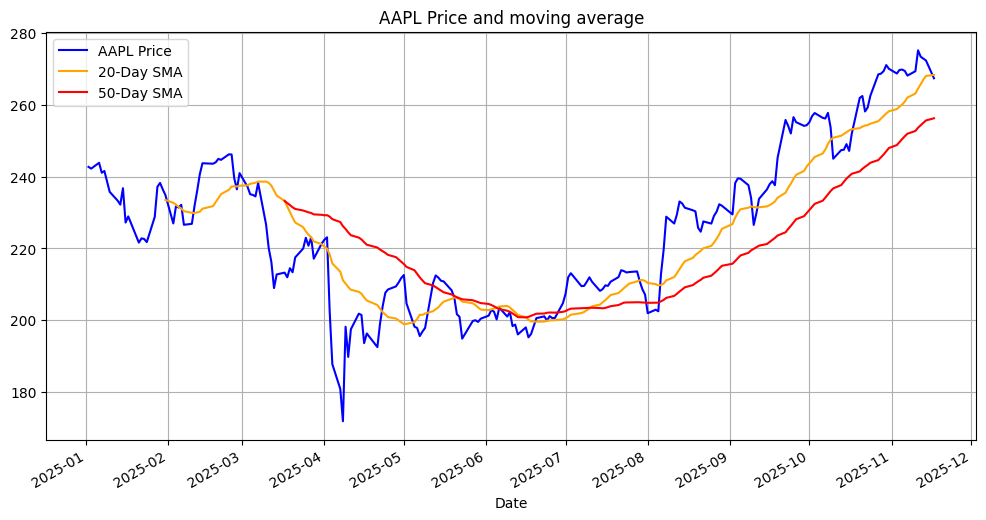

In [9]:
# visualization 
plt.figure(figsize=(12,6))
data[('Close')].plot(label='AAPL Price', color='blue')
data[('MA20')].plot(label='20-Day SMA', color='orange')
data[('MA50')].plot(label='50-Day SMA', color='red')   
plt.title('AAPL Price and moving average') 
plt.legend()
plt.grid(True)
plt.show()              

In [10]:
import numpy as np
import talib

# 1. Create some fake stock prices (close prices)
close_data = np.array([
    100.0, 102.0, 104.0, 103.0, 105.0, 
    107.0, 108.0, 109.0, 115.0, 118.0
])

# 2. Calculate a Simple Moving Average (SMA)
# We are asking for a 5-day average
sma = talib.SMA(close_data, timeperiod=5)

# 3. Print the results
print("TA-Lib Version:", talib.__version__)
print("-" * 30)
print("Input Prices:", close_data)
print("-" * 30)
print("SMA Output:", sma)

TA-Lib Version: 0.6.8
------------------------------
Input Prices: [100. 102. 104. 103. 105. 107. 108. 109. 115. 118.]
------------------------------
SMA Output: [  nan   nan   nan   nan 102.8 104.2 105.4 106.4 108.8 111.4]
